In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from subprocess import call

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Load dataset
ds_iris = datasets.load_iris()

ds = pd.DataFrame(ds_iris.data)
#ds.head()

In [15]:
#ds.info()
#ds.describe()

Printing the names of features and label types of wines

In [3]:
# print the names of the 13 features
print("Features:", ds_iris.feature_names, sep="\n")

# print the label type of wine(class_0, class_1, class_2)
print("\nLabels:", ds_iris.target_names)

# print data(feature)shape
print("Total No. of examples and features in the dataset are:", ds_iris.data.shape)

Features:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Labels: ['setosa' 'versicolor' 'virginica']
No. of examples and features in the dataset are: (150, 4)


In [10]:
print(ds_iris.data)
print(ds_iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
#split data set into train and test sets
training_data, testing_data, training_target, testing_target = train_test_split(ds_iris.data, ds_iris.target, test_size = 0.3, random_state = 3)

In [5]:
#Create a Decision Tree Classifier (using Gini)
dtc = DecisionTreeClassifier(criterion = "gini")

#Train the model using the training sets
dtc.fit(training_data, training_target)

DecisionTreeClassifier()

In [6]:
# Predict the classes of test data
pred = dtc.predict(testing_data)
print("prediction:",pred)

prediction: [0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 1 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]


In [7]:
# Model Accuracy, how often is the classifier correct?
Accuracy = metrics.accuracy_score(testing_target, pred)
print("Accuracy:",Accuracy)

Accuracy: 0.9555555555555556


In [8]:
export_graphviz(dtc,out_file='iris_tree.dot',feature_names=list(ds_iris.feature_names),
               class_names=list(ds_iris.target_names), filled=True)

# Convert to png
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'])

0

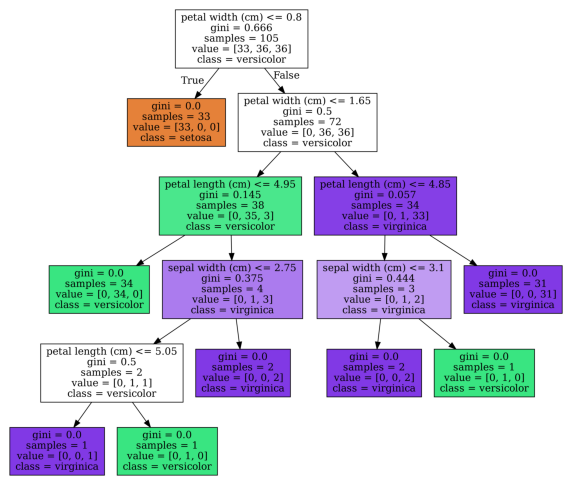

In [9]:
# Display in python
plt.figure(figsize = (10, 10))
plt.imshow(plt.imread('iris_tree.png'))
plt.axis('off')
plt.show()